In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set()
from pylab import rcParams
rcParams['figure.figsize'] = 12,6

Import data

In [2]:
df1 = pd.read_csv('2015.csv',encoding = "ISO-8859-1")
df2 = pd.read_csv('2016.csv',encoding = "ISO-8859-1")
dfc = pd.concat([df1,df2])
df = dfc[dfc['state']=='NY'].copy()
df = df[df['lawenforcementagency']=='New York Police Department'].copy()
df.reset_index(inplace=True,drop=True)

In [11]:
#drop unneeded columns
df.drop(['uid','name','streetaddress'],axis=1,inplace=True)
vc=df.drop(['age','day','year','city','state'],axis=1)

In [14]:
vc.head(2)

,gender,raceethnicity,month,classification,lawenforcementagency,armed
0,Male,White,April,Gunshot,New York Police Department,Firearm
1,Male,Black,April,Gunshot,New York Police Department,No


Male      20
Female     1
Name: gender, dtype: int64

Male      0.952381
Female    0.047619
Name: gender, dtype: float64

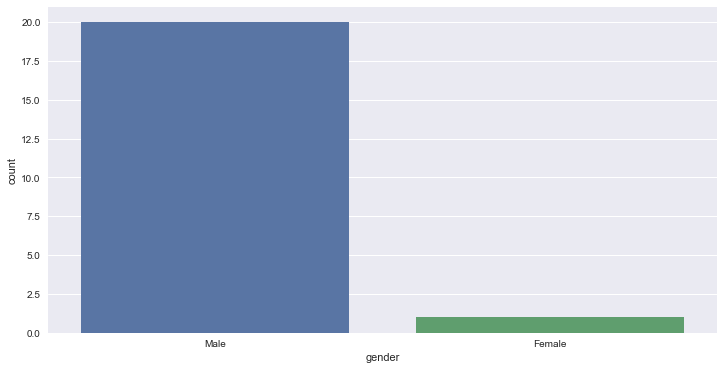

Black              13
Hispanic/Latino     4
White               2
Unknown             2
Name: raceethnicity, dtype: int64

Black              0.619048
Hispanic/Latino    0.190476
White              0.095238
Unknown            0.095238
Name: raceethnicity, dtype: float64

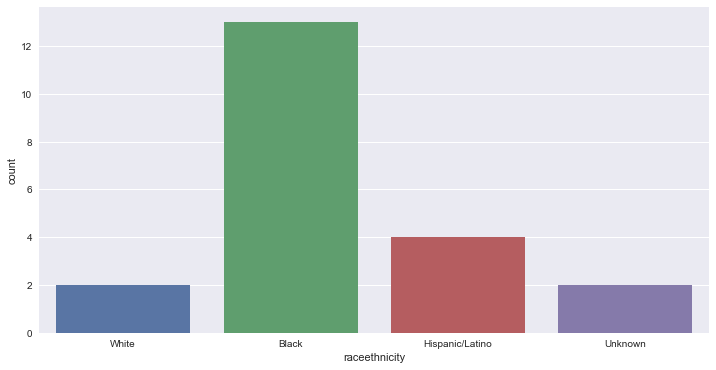

July        4
June        4
November    3
April       3
August      2
May         2
December    1
March       1
October     1
Name: month, dtype: int64

July        0.190476
June        0.190476
November    0.142857
April       0.142857
August      0.095238
May         0.095238
December    0.047619
March       0.047619
October     0.047619
Name: month, dtype: float64

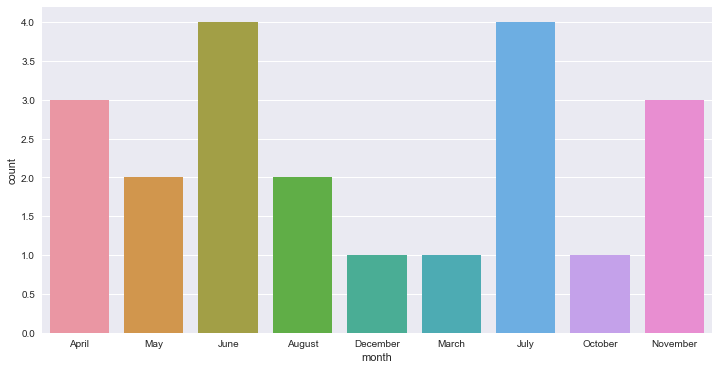

Gunshot              16
Death in custody      2
Taser                 2
Struck by vehicle     1
Name: classification, dtype: int64

Gunshot              0.761905
Death in custody     0.095238
Taser                0.095238
Struck by vehicle    0.047619
Name: classification, dtype: float64

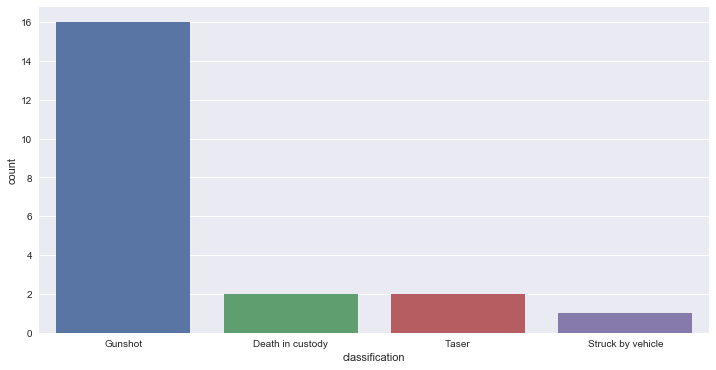

New York Police Department    21
Name: lawenforcementagency, dtype: int64

New York Police Department    1.0
Name: lawenforcementagency, dtype: float64

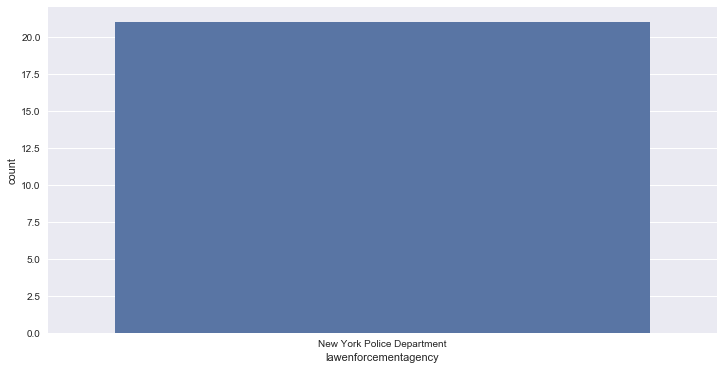

Firearm    9
No         7
Other      4
Knife      1
Name: armed, dtype: int64

Firearm    0.428571
No         0.333333
Other      0.190476
Knife      0.047619
Name: armed, dtype: float64

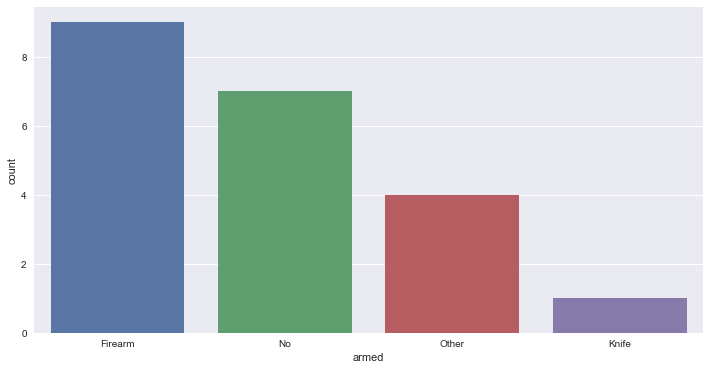

In [15]:
#print number of instances, percentages, and bar graph for each category
for col in list(vc.columns):
    df[col].value_counts()
    df[col].value_counts(normalize=True)
    sns.countplot(df[col])
    plt.show()

## NY Numbers

94% Male
### Race
White                     0.403846

Black                     0.461538

Hispanic/Latino           0.076923
### Weapon
Firearm               0.442308

No                    0.288462

Knife                 0.115385

Let's compare that to National Numbers:

## National Numbers

95% Male
## Race
White                     0.509599

Black                     0.267888

Hispanic/Latino           0.170157

## Weapon
Firearm               0.483421

No                    0.205061

Knife                 0.132635


Blacks account for only 12.3% of the US population and have been involved in 26.8% of police shootings

-----------------------------------------------   Second degree analysis   --------------------------------------------------

What percent of blacks had guns? What percent of whites had guns?

In [16]:
df[df['armed']=='Firearm']['raceethnicity'].value_counts()

Black      7
Unknown    1
White      1
Name: raceethnicity, dtype: int64

In [17]:
'{} % of blacks had guns'.format(round(100*140/307,2))

'45.6 % of blacks had guns'

In [18]:
'{} % of whites had guns'.format(round(100*306/584,2))

'52.4 % of whites had guns'

So whites were armed more often than blacks

Let's look at unarmed whites and blacks

In [19]:
df[df['armed']=='No']['raceethnicity'].value_counts()

Black              4
Hispanic/Latino    3
Name: raceethnicity, dtype: int64

In [20]:
'percent of whites who were unarmed {} %:'.format(round(100*106/584,3))

'percent of whites who were unarmed 18.151 %:'

In [21]:
'percent of blacks who were unarmed {} %:'.format(round(100*79/307,3))

'percent of blacks who were unarmed 25.733 %:'

So a higher percentage of blacks who were shot were unarmed

In [22]:
df[df['armed']=='No']['raceethnicity'].value_counts()

Black              4
Hispanic/Latino    3
Name: raceethnicity, dtype: int64

Age ---------------------------------------------------

In [23]:
df[df['age']=='Unknown']

,age,gender,raceethnicity,month,day,year,city,state,classification,lawenforcementagency,armed


Now let's normalize the race data with respect to the population

In [24]:
df['raceethnicity'].value_counts()

Black              13
Hispanic/Latino     4
White               2
Unknown             2
Name: raceethnicity, dtype: int64

In [25]:
# races = "White, Black, Hispanic/Latino, Asian/Pacific Islander, Native American".split(', ')
races = "White, Black, Hispanic/Latino".split(', ')

In [26]:
races

['White', 'Black', 'Hispanic/Latino']

In [27]:
df

,age,gender,raceethnicity,month,day,year,city,state,classification,lawenforcementagency,armed
0,30,Male,White,April,22,2015,New York,NY,Gunshot,New York Police Department,Firearm
1,24,Male,Black,April,25,2015,New York,NY,Gunshot,New York Police Department,No
2,40,Male,Hispanic/Latino,May,15,2015,New York,NY,Death in custody,New York Police Department,No
3,51,Male,Black,May,26,2015,New York,NY,Gunshot,New York Police Department,Firearm
4,51,Male,Hispanic/Latino,June,8,2015,New York,NY,Taser,New York Police Department,Other
5,19,Male,Black,June,10,2015,New York,NY,Gunshot,New York Police Department,Firearm
6,58,Male,White,June,18,2015,New York,NY,Gunshot,New York Police Department,Knife
7,38,Male,Black,August,14,2015,New York,NY,Gunshot,New York Police Department,Firearm
8,61,Male,Black,August,28,2015,Mount Vernon,NY,Gunshot,New York Police Department,No
9,36,Male,Black,December,8,2015,Yonkers,NY,Gunshot,New York Police Department,No


In [28]:
rf = df[df['raceethnicity'].apply(lambda x: x in races)]

In [29]:
rf.reset_index(drop=True,inplace=True)

In [30]:
rf

,age,gender,raceethnicity,month,day,year,city,state,classification,lawenforcementagency,armed
0,30,Male,White,April,22,2015,New York,NY,Gunshot,New York Police Department,Firearm
1,24,Male,Black,April,25,2015,New York,NY,Gunshot,New York Police Department,No
2,40,Male,Hispanic/Latino,May,15,2015,New York,NY,Death in custody,New York Police Department,No
3,51,Male,Black,May,26,2015,New York,NY,Gunshot,New York Police Department,Firearm
4,51,Male,Hispanic/Latino,June,8,2015,New York,NY,Taser,New York Police Department,Other
5,19,Male,Black,June,10,2015,New York,NY,Gunshot,New York Police Department,Firearm
6,58,Male,White,June,18,2015,New York,NY,Gunshot,New York Police Department,Knife
7,38,Male,Black,August,14,2015,New York,NY,Gunshot,New York Police Department,Firearm
8,61,Male,Black,August,28,2015,Mount Vernon,NY,Gunshot,New York Police Department,No
9,36,Male,Black,December,8,2015,Yonkers,NY,Gunshot,New York Police Department,No


In [31]:
rf['raceethnicity'].value_counts()

Black              13
Hispanic/Latino     4
White               2
Name: raceethnicity, dtype: int64

In [32]:
rf['raceethnicity'].value_counts(normalize=True)

Black              0.684211
Hispanic/Latino    0.210526
White              0.105263
Name: raceethnicity, dtype: float64

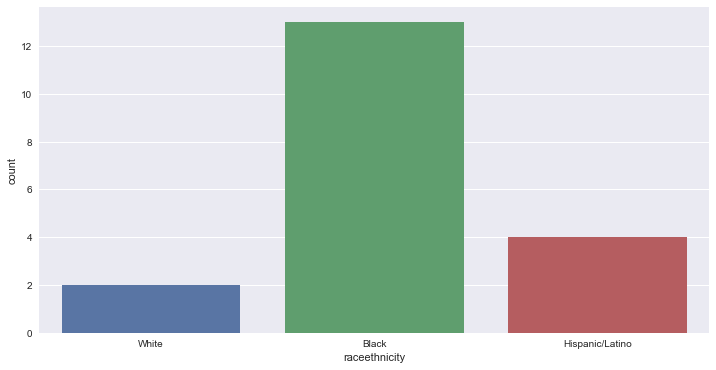

In [33]:
sns.countplot(rf['raceethnicity'])

Results: 

Fatal Shootings by NYPD: 10% white, 68% black, 20% hispanic

Fatal Shootings in NY: 40% white, 48% black, 8% hispanic

Fatal Shootings in US: 51% white, 27% black, 17% hispanic 

Let's see how this compares to the population numbers

In [34]:
# Population percentages from 2010 US Census Data

# white, black, hispanic = [45,25,28] (NYC)
# white, black, hispanic = [69.9,17.7,19] (NY)
# white, black, hispanic = [72.4,12.6,16.3] (US)

Poverty Numbers

In [35]:
#ny poverty numbers by race in 2016 
# source: https://www.kff.org/other/state-indicator/poverty-rate-by-raceethnicity/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D
# Poverty rate for the population as a whole is 12.7%

# white,black,hispanic = [13.3,21.2,24.6] (NYC)   [higher threshold for poverty from nycGOV]
# white,black,hispanic = [8,17,19] (NY)
# white,black,hispanic = [9,22,20] (US) 